In [121]:
from IPython.display import clear_output #disale logs when installing packages inside cells
clear_output()

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas import set_option
import time

import warnings
warnings.filterwarnings('ignore')  #disable jupyter warnwarnings not errors



In [122]:
train=pd.read_csv(r'C:/Users/Mehdi/Desktop/MEHDI/Projects/Ml1/train.csv')
test=pd.read_csv(r'C:/Users/Mehdi/Desktop/MEHDI/Projects/Ml1/test.csv')
submission=pd.read_csv(r'C:/Users/Mehdi/Desktop/MEHDI/Projects/Ml1/submission.csv')

RANDOM_STATE = 12 
FOLDS = 5
STRATEGY = 'median'
TARGET = 'Transported'


In [123]:

train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [124]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')
train.shape


Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


(8693, 14)

In [125]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending = False))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
PassengerId       0
dtype: int64


In [126]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [127]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [128]:
print(f'\033[94mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[94mNumber of values in train data: {test.count().sum()}')
print(f'\033[94mNo of rows with missing values  in test data: {sum(test.isna().sum())}')

Number of rows in test data: 4277
Number of columns in test data: 13
Number of values in train data: 54484
No of rows with missing values  in test data: 1117


In [129]:
print(f'\033[94m')
print((test.isna().sum().sort_values(ascending = False)))


FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
VIP              93
CryoSleep        93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [130]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.00,4195.00,4171.00,4179.00,4176.00,4197.00
mean,28.66,219.27,439.48,177.30,303.05,310.71
std,14.18,607.01,1527.66,560.82,1117.19,1246.99
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,0.00,0.00,0.00,0.00,0.00
75%,37.00,53.00,78.00,33.00,50.00,36.00
max,79.00,11567.00,25273.00,8292.00,19844.00,22272.00


In [131]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [132]:
train.drop(['PassengerId'] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)
FEATURES = [col for col in train.columns if col != TARGET]
RANDOM_STATE = 12 

In [133]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.00,458.08,1611.49,0.00,0.00,0.00,76.00,29813.00
VRDeck,8505.00,304.85,1145.72,0.00,0.00,0.00,46.00,24133.00
Spa,8510.00,311.14,1136.71,0.00,0.00,0.00,59.00,22408.00
RoomService,8512.00,224.69,666.72,0.00,0.00,0.00,47.00,14327.00
ShoppingMall,8485.00,173.73,604.70,0.00,0.00,0.00,27.00,23492.00
Age,8514.00,28.83,14.49,0.00,19.00,27.00,38.00,79.00


In [134]:
# ----------------------------------Column wise Null Value Distribution

test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)' , 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=test_null[0], 
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)], 
                                line_color='rgb(0,0,0)', 
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

In [135]:
# -----------------------------------Row wise Null Value Distribution
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_test_row = test.isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_test_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100
missing_test_row["count"] = missing_test_row["count"]*100


fig = make_subplots(rows=1, 
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values",)

fig.add_trace(go.Bar(x=missing_train_row["no"], 
                     y=missing_train_row["count"]  ,
                    marker=dict(color=[n for n in range(4)], 
                                 line_color='rgb(0,0,0)' ,
                                line_width = 3
                                ,coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x= missing_test_row["no"], 
                     y=missing_test_row["count"],
                    marker=dict(color=[n for n in range(4)], 
                                line_color='rgb(0,0,0)',
                                line_width = 3 ,
                                coloraxis="coloraxis")),
                            1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

In [136]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, pull=[0.1, 0, 0 ],
    marker=dict(colors=colors, 
                line=dict(color='#000000', 
                          width=2))
)])
fig.show()

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


In [137]:
train_age = train.copy()
test_age = test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['#58D68D','#DE3163'],
                   marginal="box",
                   nbins= 100,
                    template="plotly_white"
                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

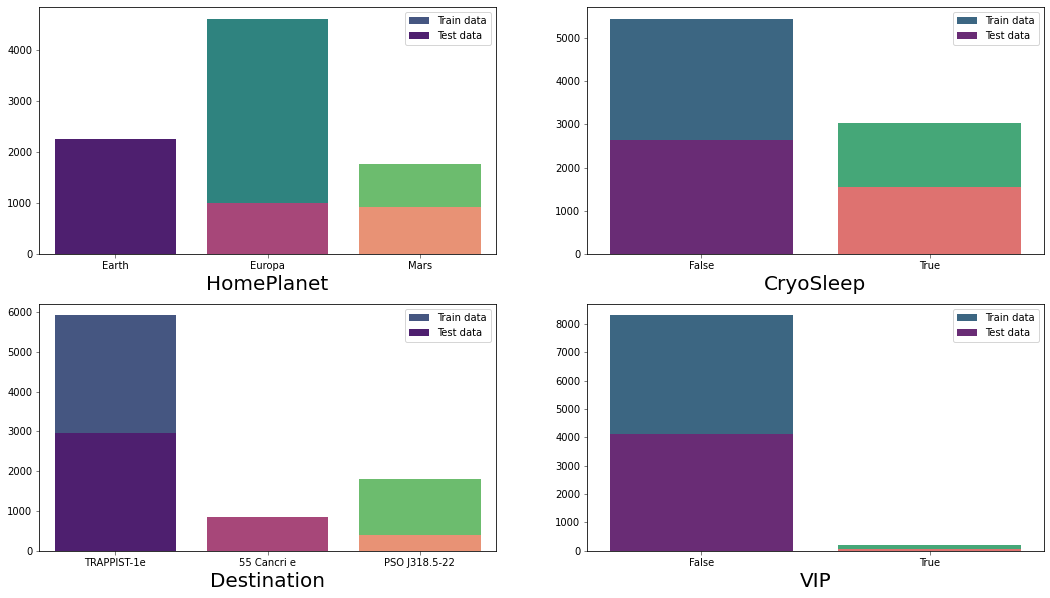

In [138]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(train[col],ax = axes[r,c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[r,c] ,palette = "magma", label='Test data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

In [139]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count'
            ) 
fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)
fig.update_layout(title = "Target Distribution",
                  template = "plotly_white",
                  title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / train.shape[0]))
fig.show()

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


In [140]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

In [141]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [142]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)

In [143]:
train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train.drop(TARGET , axis =1 )
y = train[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

In [144]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()
models[:22]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.12
XGBClassifier,0.78,0.78,0.78,0.78,0.20
AdaBoostClassifier,0.77,0.77,0.77,0.77,0.27
RandomForestClassifier,0.77,0.77,0.77,0.77,0.68
NuSVC,0.77,0.77,0.77,0.77,1.24
LogisticRegression,0.77,0.77,0.77,0.77,0.07
SVC,0.77,0.77,0.77,0.77,1.01
ExtraTreesClassifier,0.76,0.76,0.76,0.76,0.56
LinearSVC,0.76,0.76,0.76,0.76,0.31


In [145]:
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [146]:
line = px.line(data_frame= models ,y =["ROC AUC" , "F1 Score"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "ROC AUC SCORE")
line.update_layout(showlegend = True,
    title = {
        'text': 'ROC AUC and F1 Score vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [147]:
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Time(s)")
line.update_traces(line_color="purple")
line.update_layout(showlegend = True,
    title = {
        'text': 'TIME TAKEN vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [64]:
lgb_params = {
    'objective' : 'binary',
    'n_estimators' :50,
    'learning_rate' : 0.08
}

lgb_predictions = 0
lgb_scores = []
lgb_fimp = []
FEATURES = list(train.columns)[:-1]
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    print(f'\033[94m')
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    
    print(f"Fold={fold+1}, Accuracy score: {acc:.2f}%, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[FEATURES]) 
    lgb_predictions += test_preds/FOLDS
print("")
print("Mean Accuracy :", np.mean(lgb_scores))


========== Fold=1 ==========
Fold=1, Accuracy score: 0.81%, Run Time: 0.08s

========== Fold=2 ==========
Fold=2, Accuracy score: 0.78%, Run Time: 0.06s

========== Fold=3 ==========
Fold=3, Accuracy score: 0.79%, Run Time: 0.06s

========== Fold=4 ==========
Fold=4, Accuracy score: 0.79%, Run Time: 0.05s

========== Fold=5 ==========
Fold=5, Accuracy score: 0.81%, Run Time: 0.06s

Mean Accuracy : 0.7953533338935979


In [149]:

models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('ExtraTreesClassifier',ExtraTreesClassifier()))
# models.append(('XGBRegressor',XGBRegressor()))
models.append(('XGBClassifier',XGBClassifier()))
# models.append(('LGBMRegressor',LGBMRegressor()))
models.append(('LGBMClassifier',LGBMClassifier()))
# models.append(('CatBoostRegressor',CatBoostRegressor()))
models.append(('CatBoostClassifier',CatBoostClassifier()))
models.append(('make_classification',make_classification()))

results=[]
for name,model in models:
              kfold=KFold(n_splits=10,random_state=12,shuffle=True,)
              cv_results=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
              results.append(cv_results)
              print(f'{name}:\n{cv_results.mean()} {cv_results.std()}')

LogisticRegression:
0.7806259010885812 0.013983072959192355
LinearDiscriminantAnalysis:
0.7584251947674036 0.014059949644514756
KNeighborsClassifier:
0.7638293453963468 0.012320038408514962
DecisionTreeClassifier:
0.7346122508366071 0.008664653452948704
GaussianNB:
0.6978004841077734 0.0148854703868948
SVC:
0.7875272145285239 0.009482922986631141
AdaBoostClassifier:
0.7860329616549607 0.009882378037684375
GradientBoostingClassifier:
0.7939703450921259 0.008959960406668036
RandomForestClassifier:
0.7882193828287237 0.012361235324422156
ExtraTreesClassifier:
0.7782103884766478 0.01135528773327011
XGBClassifier:
0.7879902913905532 0.0069628242375051165
LGBMClassifier:
0.7953534912635742 0.009161461378349499
Learning rate set to 0.024797
0:	learn: 0.6813009	total: 165ms	remaining: 2m 44s
1:	learn: 0.6701645	total: 172ms	remaining: 1m 25s
2:	learn: 0.6581804	total: 180ms	remaining: 59.7s
3:	learn: 0.6482980	total: 188ms	remaining: 46.7s
4:	learn: 0.6387947	total: 196ms	remaining: 38.9s
5:	l

184:	learn: 0.4220291	total: 1.28s	remaining: 5.64s
185:	learn: 0.4219096	total: 1.28s	remaining: 5.62s
186:	learn: 0.4215899	total: 1.29s	remaining: 5.61s
187:	learn: 0.4214869	total: 1.3s	remaining: 5.6s
188:	learn: 0.4213810	total: 1.3s	remaining: 5.59s
189:	learn: 0.4212768	total: 1.31s	remaining: 5.58s
190:	learn: 0.4210411	total: 1.31s	remaining: 5.56s
191:	learn: 0.4208964	total: 1.32s	remaining: 5.55s
192:	learn: 0.4207982	total: 1.32s	remaining: 5.54s
193:	learn: 0.4206857	total: 1.33s	remaining: 5.53s
194:	learn: 0.4204739	total: 1.33s	remaining: 5.51s
195:	learn: 0.4203452	total: 1.34s	remaining: 5.5s
196:	learn: 0.4202524	total: 1.34s	remaining: 5.48s
197:	learn: 0.4199800	total: 1.35s	remaining: 5.47s
198:	learn: 0.4198161	total: 1.35s	remaining: 5.46s
199:	learn: 0.4196933	total: 1.36s	remaining: 5.45s
200:	learn: 0.4194672	total: 1.37s	remaining: 5.43s
201:	learn: 0.4193320	total: 1.37s	remaining: 5.42s
202:	learn: 0.4192139	total: 1.38s	remaining: 5.41s
203:	learn: 0.41

356:	learn: 0.4024715	total: 2.57s	remaining: 4.63s
357:	learn: 0.4023773	total: 2.58s	remaining: 4.62s
358:	learn: 0.4022962	total: 2.59s	remaining: 4.62s
359:	learn: 0.4021136	total: 2.6s	remaining: 4.62s
360:	learn: 0.4020362	total: 2.6s	remaining: 4.61s
361:	learn: 0.4019521	total: 2.61s	remaining: 4.6s
362:	learn: 0.4018267	total: 2.62s	remaining: 4.6s
363:	learn: 0.4017558	total: 2.63s	remaining: 4.59s
364:	learn: 0.4016962	total: 2.63s	remaining: 4.58s
365:	learn: 0.4016409	total: 2.64s	remaining: 4.57s
366:	learn: 0.4015189	total: 2.65s	remaining: 4.57s
367:	learn: 0.4013902	total: 2.65s	remaining: 4.56s
368:	learn: 0.4013382	total: 2.66s	remaining: 4.55s
369:	learn: 0.4011997	total: 2.67s	remaining: 4.54s
370:	learn: 0.4011464	total: 2.67s	remaining: 4.54s
371:	learn: 0.4009925	total: 2.68s	remaining: 4.53s
372:	learn: 0.4008993	total: 2.69s	remaining: 4.53s
373:	learn: 0.4008346	total: 2.7s	remaining: 4.52s
374:	learn: 0.4007656	total: 2.71s	remaining: 4.51s
375:	learn: 0.400

537:	learn: 0.3841816	total: 3.88s	remaining: 3.33s
538:	learn: 0.3841025	total: 3.88s	remaining: 3.32s
539:	learn: 0.3839512	total: 3.89s	remaining: 3.31s
540:	learn: 0.3838730	total: 3.89s	remaining: 3.3s
541:	learn: 0.3837677	total: 3.9s	remaining: 3.29s
542:	learn: 0.3837013	total: 3.9s	remaining: 3.28s
543:	learn: 0.3835697	total: 3.91s	remaining: 3.27s
544:	learn: 0.3834275	total: 3.91s	remaining: 3.26s
545:	learn: 0.3833060	total: 3.91s	remaining: 3.25s
546:	learn: 0.3831659	total: 3.92s	remaining: 3.25s
547:	learn: 0.3830507	total: 3.92s	remaining: 3.24s
548:	learn: 0.3829366	total: 3.93s	remaining: 3.23s
549:	learn: 0.3828871	total: 3.93s	remaining: 3.22s
550:	learn: 0.3827921	total: 3.94s	remaining: 3.21s
551:	learn: 0.3827006	total: 3.94s	remaining: 3.2s
552:	learn: 0.3826206	total: 3.94s	remaining: 3.19s
553:	learn: 0.3825144	total: 3.95s	remaining: 3.18s
554:	learn: 0.3824380	total: 3.95s	remaining: 3.17s
555:	learn: 0.3823740	total: 3.96s	remaining: 3.16s
556:	learn: 0.38

715:	learn: 0.3682075	total: 4.96s	remaining: 1.97s
716:	learn: 0.3681044	total: 4.97s	remaining: 1.96s
717:	learn: 0.3680361	total: 4.98s	remaining: 1.96s
718:	learn: 0.3678937	total: 4.99s	remaining: 1.95s
719:	learn: 0.3678697	total: 4.99s	remaining: 1.94s
720:	learn: 0.3677948	total: 5s	remaining: 1.93s
721:	learn: 0.3677079	total: 5.01s	remaining: 1.93s
722:	learn: 0.3676193	total: 5.01s	remaining: 1.92s
723:	learn: 0.3675540	total: 5.02s	remaining: 1.91s
724:	learn: 0.3674626	total: 5.03s	remaining: 1.91s
725:	learn: 0.3673712	total: 5.04s	remaining: 1.9s
726:	learn: 0.3672983	total: 5.05s	remaining: 1.89s
727:	learn: 0.3672057	total: 5.05s	remaining: 1.89s
728:	learn: 0.3671852	total: 5.06s	remaining: 1.88s
729:	learn: 0.3671144	total: 5.07s	remaining: 1.88s
730:	learn: 0.3670354	total: 5.08s	remaining: 1.87s
731:	learn: 0.3669732	total: 5.08s	remaining: 1.86s
732:	learn: 0.3669122	total: 5.09s	remaining: 1.85s
733:	learn: 0.3668051	total: 5.09s	remaining: 1.84s
734:	learn: 0.36

889:	learn: 0.3541950	total: 5.67s	remaining: 701ms
890:	learn: 0.3541405	total: 5.67s	remaining: 694ms
891:	learn: 0.3540898	total: 5.68s	remaining: 688ms
892:	learn: 0.3540221	total: 5.68s	remaining: 681ms
893:	learn: 0.3539699	total: 5.69s	remaining: 674ms
894:	learn: 0.3539277	total: 5.69s	remaining: 667ms
895:	learn: 0.3538805	total: 5.69s	remaining: 661ms
896:	learn: 0.3537835	total: 5.7s	remaining: 654ms
897:	learn: 0.3537378	total: 5.7s	remaining: 647ms
898:	learn: 0.3536451	total: 5.7s	remaining: 641ms
899:	learn: 0.3535232	total: 5.71s	remaining: 634ms
900:	learn: 0.3534370	total: 5.71s	remaining: 627ms
901:	learn: 0.3533570	total: 5.71s	remaining: 621ms
902:	learn: 0.3532990	total: 5.72s	remaining: 614ms
903:	learn: 0.3532064	total: 5.72s	remaining: 607ms
904:	learn: 0.3530968	total: 5.72s	remaining: 601ms
905:	learn: 0.3530365	total: 5.73s	remaining: 594ms
906:	learn: 0.3529812	total: 5.73s	remaining: 588ms
907:	learn: 0.3529274	total: 5.73s	remaining: 581ms
908:	learn: 0.3

TypeError: '<' not supported between instances of 'str' and 'bool'

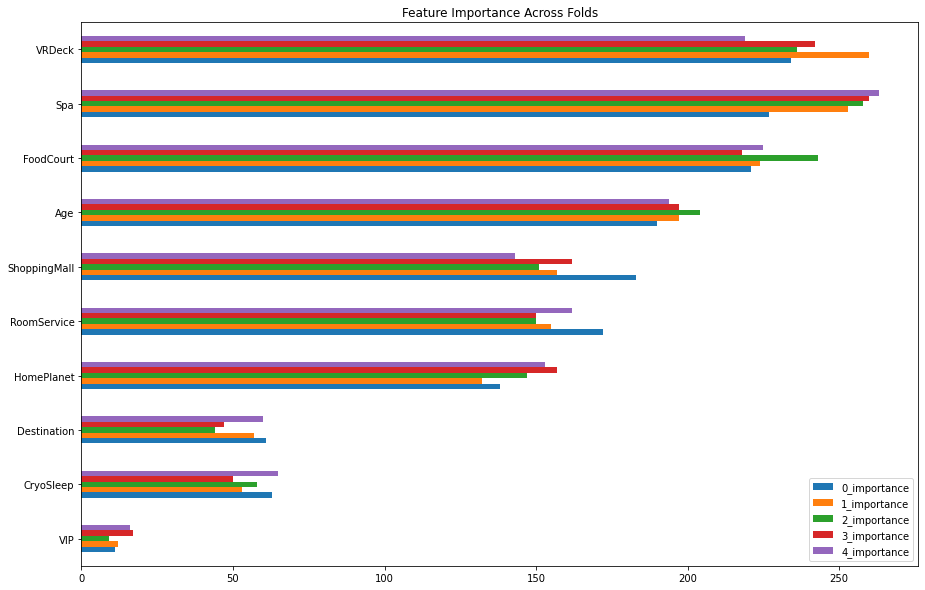

In [59]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

In [60]:
submission[TARGET] = lgb_predictions.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
